In [1]:
#import os
#os.remove("/kaggle/working/processed.db")
#os.remove("/kaggle/working")
#os.remove("")

Libraries

In [2]:
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.sparse
import pickle
print(1)


1


In [3]:
from sqlite3 import connect
from wordcloud import WordCloud
from sqlalchemy import create_engine
print(2)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
print(3)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score, precision_score, recall_score, pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import SGDClassifier
print(4)
from datetime import datetime
import re
import os
print(5)

2
3
4
5


In [4]:
print(os.path.isfile('train.db'))
if not os.path.isfile('train.db'):
    #print(1)
    start = datetime.now()
    disk_engine = create_engine('sqlite:///train.db')
    start = datetime.now()
    chunksize = 18000
    j = 0
    index_start = 1
    for df in pd.read_csv('C:/Users/MOHIT/OneDrive/Desktop/Train.csv', names = 
                        ['Id','Title', 'Body','Tags'], chunksize = chunksize, iterator = True, encoding = 'utf-8') : 
        df.index += index_start
        j+=1
        print( '{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists = 'append')
        index_start = df.index[-1] +1
    print("Time to run ",datetime.now()-start)
    #df.head(20)

False
18000 rows
36000 rows
54000 rows
72000 rows
90000 rows
108000 rows
126000 rows
144000 rows
162000 rows
180000 rows
198000 rows
216000 rows
234000 rows
252000 rows
270000 rows
288000 rows
306000 rows
324000 rows
342000 rows
360000 rows
378000 rows
396000 rows
414000 rows
432000 rows
450000 rows
468000 rows
486000 rows
504000 rows
522000 rows
540000 rows
558000 rows
576000 rows
594000 rows
612000 rows
630000 rows
648000 rows
666000 rows
684000 rows
702000 rows
720000 rows
738000 rows
756000 rows
774000 rows
792000 rows
810000 rows
828000 rows
846000 rows
864000 rows
882000 rows
900000 rows
918000 rows
936000 rows
954000 rows
972000 rows
990000 rows
1008000 rows
1026000 rows
1044000 rows
1062000 rows
1080000 rows
1098000 rows
1116000 rows
1134000 rows
1152000 rows
1170000 rows
1188000 rows
1206000 rows
1224000 rows
1242000 rows
1260000 rows
1278000 rows
1296000 rows
1314000 rows
1332000 rows
1350000 rows
1368000 rows
1386000 rows
1404000 rows
1422000 rows
1440000 rows
1458000 rows
1

In [5]:
df.head(20)

,Id,Title,Body,Tags
1019070001,6030000,rdiff-backup restoring directories without sub...,<p>Is there a way to restore rdiff-backup gene...,backup restore rdiff-backup
1019070002,6030001,How do I restrict a users access to an object?,"<p>Hi Sitepoint wizard people,</p>\n\n<p>Say w...",mvc authorization access-control
1019070003,6030002,Multithread testing,<p>I have a task to firstly write a multithrea...,java multithreading testing
1019070004,6030003,Check whether a file is open in Matlab,<p>I'm downloading some big files(2GB) and als...,file matlab ubuntu filesystems
1019070005,6030004,Coherent read-only view of a database,<p>I would like to perform a select query that...,sql database
1019070006,6030005,How to properly close a socket after an except...,<p>After my last project I had the problem tha...,java exception-handling sockets
1019070007,6030006,Appending a GET-Variable to wp_nav_menu,<p>I'm creating a menu with the wp_nav_menu() ...,menus
1019070008,6030007,SaveAs Method for ApplicationSettingsBase,<p>How can I do a <em>SaveAs(string file)</em>...,.net configuration-files
1019070009,6030008,ModalViewCOntroller in NavigationController,<p>I have a NavigationController that present ...,iphone objective-c data uinavigationcontroller...
1019070010,6030009,WCF service reference Client config not config...,<p>I am very new to WCF Web service. I am deve...,c# wcf windows-phone-7


In [6]:
con = sqlite3.connect('train.db')
count = pd.read_sql_query("""SELECT count(*) FROM data LIMIT 30000""", con)
print("Total rows in training set = ", count["count(*)"])

Total rows in training set =  0    6034196
Name: count(*), dtype: int64


There are approx 60 lakhs data in the dataset

In [7]:
con.close()
con = sqlite3.connect('train.db')
df = pd.read_sql_query('SELECT Title, Body, Tags, COUNT(*) as cnt_dup FROM data GROUP BY Title, Body, Tags',con)
con.close()
df.size

16825260

In [8]:
df.head(20)

,Title,Body,Tags,cnt_dup
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2
5,Better way to update feed on FB with PHP SDK,<p>I am a novice with the Facebook API. I have...,facebook api facebook-php-sdk,1
6,btnAdd click event opens two window after r...,<p>i m opening window(search.aspx)using below ...,javascript asp.net web,3
7,"""SQL Injection"" issue preventing correct for...",<p>So I've been checking everything I can thin...,php forms,1
8,Countable subadditivity of the Lebesgue measure,<p>Let $\lbrace F_n \rbrace$ be a sequence of ...,real-analysis measure-theory,3
9,HQL equivalent to this Sql Query,"<pre><code>select part.PaId,part.PaName,part.P...",hibernate hql,2


<AxesSubplot:>

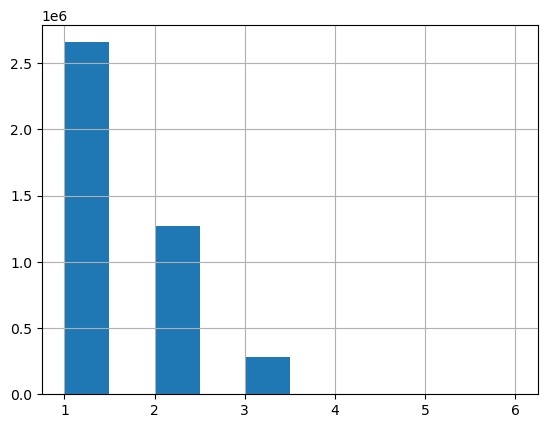

In [9]:
df.cnt_dup.hist()

There are approx 14% duplicate records in the dataset and approx 0.1% records have occured three times.

In [10]:
df.cnt_dup.value_counts()

1    2656284
2    1272336
3     277575
4         90
5         25
6          5
Name: cnt_dup, dtype: int64

In [11]:
del count

In [12]:
df = df[df.cnt_dup <2]
df = df.reset_index(drop = True)
df.size


10625136

In [13]:
df.head(20)

,Title,Body,Tags,cnt_dup
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1
4,Better way to update feed on FB with PHP SDK,<p>I am a novice with the Facebook API. I have...,facebook api facebook-php-sdk,1
5,"""SQL Injection"" issue preventing correct for...",<p>So I've been checking everything I can thin...,php forms,1
6,Undefined symbols for architecture i386: _OB...,<p>I have imported framework for sending email...,iphone email-integration,1
7,java.lang.NoSuchMethodError: javax.servlet.S...,<p>i want to have a servlet to process inputs ...,java servlets jboss,1
8,obtaining updated locations using gps in ser...,<p>I have app in which i have two buttons <str...,android android-widget android-service,1
9,"""Specified initialization vector (IV) does no...",<p>I've had troubles using an CryptoStream for...,c# .net rijndaelmanaged cryptostream,1


Deleted the duplicate records and triplicate records

All the possible tags are:

In [14]:
print(df['Tags'])
df.shape

0                                        c++ c
1                  c# silverlight data-binding
2          c# silverlight data-binding columns
3                                     jsp jstl
4                facebook api facebook-php-sdk
                          ...                 
2656279                                sip sdp
2656280                             c++ opengl
2656281     php php-errors zend-studio php-5.2
2656282                         php mysql text
2656283     php codeigniter character-encoding
Name: Tags, Length: 2656284, dtype: object


(2656284, 4)

In [15]:
from tqdm import tqdm
import multiprocessing
def seperate(a ,l, r):
    tags = ["c#","java", "asp.net", "c++", "c", "ios" , "javascript"]
    for i in tqdm(range(l,r)):
        for k in tags:
            #print(i)
            if(df.iloc[i].Tags is not None) and k in df.iloc[i].Tags.split():
                a.append(i)
                break
    return a
start = datetime.now()
print(datetime.now() - start)

0:00:00


In [16]:
from multiprocessing import Pool
manager = multiprocessing.Manager()

shared_list = manager.list()
shared_list = seperate(shared_list, 0, 885427)
shared_list = seperate(shared_list, 885427, 1770854)
shared_list = seperate(shared_list, 1770854, df.shape[0])
#print(shared_list)
#p1 = multiprocessing.Process(target = seperate, args = [shared_list, 0, 885427])
#p2 = multiprocessing.Process(target = seperate, args = [shared_list, 885427, 1770854])
#p3 = multiprocessing.Process(target = seperate, args = [shared_list, 1770854, df.shape[0]])

#p1.start()
#p2.start()
#p3.start()


100%|████████████████████████████████████████████████████████████████████████| 885430/885430 [08:22<00:00, 1763.70it/s]


In [17]:
b = []
b.extend(shared_list)
len(b)
#print(b)

832012

In [18]:
df = df.iloc[b]
df = df.reset_index(drop = True)
df.head()

,Title,Body,Tags,cnt_dup
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1
3,java.lang.NoSuchMethodError: javax.servlet.S...,<p>i want to have a servlet to process inputs ...,java servlets jboss,1
4,"""Specified initialization vector (IV) does no...",<p>I've had troubles using an CryptoStream for...,c# .net rijndaelmanaged cryptostream,1


In [19]:
if not os.path.isfile('without_duplicates.db'):
    disk_dup = create_engine("sqlite:///without_duplicates.db")
    no_dup = pd.DataFrame(df, columns = ['Title', 'Body', 'Tags'])
    no_dup.to_sql('no_dup_train',disk_dup)

In [20]:
con = sqlite3.connect('without_duplicates.db')
k = pd.read_sql_query("""SELECT * FROM no_dup_train""",con)
count = pd.read_sql_query("""SELECT count(*) FROM no_dup_train""", con)
print("Total rows in training set = ", count["count(*)"])
con.close()
print(k)

Total rows in training set =  0    832012
Name: count(*), dtype: int64
         index                                              Title  \
0            0       Implementing Boundary Value Analysis of S...   
1            1           Dynamic Datagrid Binding in Silverlight?   
2            2           Dynamic Datagrid Binding in Silverlight?   
3            3    java.lang.NoSuchMethodError: javax.servlet.S...   
4            4   "Specified initialization vector (IV) does no...   
...        ...                                                ...   
832007  832007  “var” variables, "this" variables and "global"...   
832008  832008  „menuinterface.Menu.exit' is never assigned to...   
832009  832009         ™ gets converted to â„ ¢ DOMDocument XPath   
832010  832010  ∞ gets converted to âˆž when inserted into MyS...   
832011  832011                                  关于Nehe教程，SDK配置的疑问   

                                                     Body  \
0       <pre><code>#include&lt;iostream

In [21]:
k = k.drop(["index"], axis = 1)

In [22]:
k.head()

,Title,Body,Tags
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns
3,java.lang.NoSuchMethodError: javax.servlet.S...,<p>i want to have a servlet to process inputs ...,java servlets jboss
4,"""Specified initialization vector (IV) does no...",<p>I've had troubles using an CryptoStream for...,c# .net rijndaelmanaged cryptostream


In [23]:
f = k.Body.iloc[3]
print(f)

<p>i want to have a servlet to process inputs from a standalone java program. how to deploy this servlet in jboss. I put the servlet.class file in WEB-INF/classes and in web.xml i gave the servlet url mapping as ".do". From my Java client program i opened connected to the servlet using a URL object. using localhost:8080/.do. BUT i am getting the folowing error:</p>

<pre>
  ERROR [org.apache.catalina.connector.CoyoteAdapter] An exception or error occurred in the container during the request processing: 
  java.lang.NoSuchMethodError: javax.servlet.ServletContext.getEffectiveSessionTrackingModes()Ljava/util/Set;
            at
     org.apache.catalina.connector.CoyoteAdapter.postParseRequest(CoyoteAdapter.java:567)
            at org.apache.catalina.connector.CoyoteAdapter.service(CoyoteAdapter.java:359)
            at org.apache.coyote.http11.Http11Processor.process(Http11Processor.java:877)
            at org.apache.coyote.http11.Http11Protocol$Http11ConnectionHandler.process(Http11Pr

PREPROCESSING

#Cleaning Title of questions as follows:
1. #Removing Redundant spaces
1. #Removing Stopwords
1. #Removing curly brackets

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MOHIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from tqdm import tqdm
from bs4 import BeautifulSoup
preprocessed_reviews = []
for sentence in tqdm(k.Title.values):
  sentence = re.sub(r"http\S+", "", sentence)
  sentence = BeautifulSoup(sentence, 'lxml').get_text()
  sentence = re.sub("\S*\d\S*", "", sentence).strip()
  sentence = re.sub('[^A-Za-z]+', ' ',sentence)
  sentence = ' '.join(e.lower() for e in sentence.split() if e.lower()not in stopwords.words('english'))
  preprocessed_reviews.append(sentence.strip())

  0%|                                                                                       | 0/832012 [00:00<?, ?it/s]C:\Users\MOHIT\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
100%|█████████████████████████████████████████████████████████████████████████| 832012/832012 [15:46<00:00, 879.22it/s]


Cleaned tags are set as default titles in the dataframe.

In [26]:
k.Title = preprocessed_reviews

In [27]:
new_tags = []
for i in tqdm(range(k.shape[0])):
  j = k.Tags.iloc[i].split()[0]
  new_tags.append(j)

100%|██████████████████████████████████████████████████████████████████████| 832012/832012 [00:04<00:00, 177724.90it/s]


In [28]:
k.Tags = new_tags
k.head(20)

,Title,Body,Tags
0,implementing boundary value analysis software ...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++
1,dynamic datagrid binding silverlight,<p>I should do binding for datagrid dynamicall...,c#
2,dynamic datagrid binding silverlight,<p>I should do binding for datagrid dynamicall...,c#
3,java lang nosuchmethoderror javax servlet serv...,<p>i want to have a servlet to process inputs ...,java
4,specified initialization vector iv match block...,<p>I've had troubles using an CryptoStream for...,c#
5,selcurrentmanuf declared may inaccessible due ...,<p>i have a drop down list i am trying to use ...,asp.net
6,things division zero c,<blockquote>\n <p><strong>Possible Duplicate:...,c++
7,asp net mvc single page application using java...,<p>I have recently built an single-page ASP.NE...,javascript
8,adapter pattern,<p>I have a problem in which I have to copy da...,c#
9,add custom html attributes generated controls,<p>I just want to add a placeholder for my gen...,asp.net


In [29]:
k.describe()

,Title,Body,Tags
count,832012,832012,832012
unique,813051,824308,433
top,,<p>I've now googled around and tried various m...,c#
freq,151,3,216114


In [30]:
k.Tags.describe()

count     832012
unique       433
top           c#
freq      216114
Name: Tags, dtype: object

In [31]:
k.groupby(["Tags"]).describe()


Title         \
               count unique   
Tags                          
.htaccess          1      1   
.net            2115   2096   
.net-framework     3      3   
2007              11     11   
2010              51     51   
...              ...    ...   
xna                3      3   
xul                1      1   
youtube            1      1   
yum                1      1   
zip                1      1   

                                                                        Body  \
                                                              top freq count   
Tags                                                                           
.htaccess                                      pre gzip static js    1     1   
.net                            expose net object remote c client    2  2115   
.net-framework         asp net dotnetnuke using pre made websites    1     3   
2007            default reader site group people picker retrie...    1    11   
2010                              asmx webservice use list object    1    51   
...                                                           ...  ...   ...   
xna                                     sample generating garbage    1     3   
xul             xul create menu items dynamically set selected...    1     1   
youtube                       way arrange movies youtube videobar    1     1   
yum                                   update version gcc c fedora    1     1   
zip                             possible zip contents directory c    1     1   

                                                                               
               unique                                                top freq  
Tags                                                                           
.htaccess           1  <p>my site is running IPB 3.1.4 and I want to ...    1  
.net             2113  <p>We have a .net library developed in C#.\nIt...    2  
.net-framework      3  <p>I would really appreciate any useful inform...    1  
2007               11  <p>I have an issue with people picker for SQL ...    1  
2010               51  <p>I have developed WCF service in Visual Stud...    1  
...               ...                                                ...  ...  
xna                 3  <pre class="lang-cs prettyprint-override"><cod...    1  
xul                 1  <p>I have a firefox extension Options pref pan...    1  
youtube             1  <p><br />\nI am using the <a href="http://www....    1  
yum                 1  <p>I have version 4.4.4 of <code>gcc</code> in...    1  
zip                 1  <p>Im developing a c# application which has to...    1  

[433 rows x 8 columns]

In [32]:
k

,Title,Body,Tags
0,implementing boundary value analysis software ...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++
1,dynamic datagrid binding silverlight,<p>I should do binding for datagrid dynamicall...,c#
2,dynamic datagrid binding silverlight,<p>I should do binding for datagrid dynamicall...,c#
3,java lang nosuchmethoderror javax servlet serv...,<p>i want to have a servlet to process inputs ...,java
4,specified initialization vector iv match block...,<p>I've had troubles using an CryptoStream for...,c#
...,...,...,...
832007,var variables variables global variables insid...,"<p>After my last question, this one is more ac...",javascript
832008,menuinterface menu exit never assigned always ...,<p>How I can use Exit() in another class? I wa...,c#
832009,gets converted domdocument xpath,<p>If I have</p>\n\n<pre><code>&lt;p id='test'...,php
832010,gets converted inserted mysql table,<p>The infinity (<code>∞</code>) symbol gets c...,php


In [33]:
k[k.Tags == "2007"]
#tag_list = ["c#", "java", "c++", "ios", "c", "javascript"]
tag_list = ["c#","java", "asp.net", "c++", "c", "ios" , "javascript"]

In [34]:
new_indices = []
for i in tqdm(range(k.shape[0])):
    for j in tag_list:
        if j == k.Tags.iloc[i]:
            new_indices.append(i)
            break

100%|███████████████████████████████████████████████████████████████████████| 832012/832012 [00:15<00:00, 53635.53it/s]


In [35]:
len(new_indices)

774237

In [36]:
k = k.iloc[new_indices]

In [37]:
k.groupby(["Tags"]).describe()

Title                                      Body          \
             count  unique                  top freq   count  unique   
Tags                                                                   
asp.net      43921   43119                        14   43921   43535   
c            35421   34343                 mean   12   35421   34765   
c#          216114  212217                        23  216114  214429   
c++          90623   88342                        26   90623   89547   
ios          32124   31785  collision detection    3   32124   31946   
java        198230  193676                        40  198230  195993   
javascript  157804  154795           javascript   47  157804  156766   

                                                                    
                                                          top freq  
Tags                                                                
asp.net     <p>I have a asp.net webpage with a series of h...    2  
c           <p>I am getting an error that says:</p>\n\n<p>...    3  
c#          <p>I have a chart that looks like this:</p>\n\...    3  
c++         <p>I have a project for school where we need t...    3  
ios         <p>Is it possible to make a plist type file wi...    2  
java        <p>I am interested in doing this C code in Jav...    3  
javascript  <p>I am doing research on a subject. The sites...    2

In [38]:
if not os.path.isfile('processed.db'):
    processed = create_engine("sqlite:///processed.db")
    k.to_sql('processed',processed)

In [39]:
con = sqlite3.connect('processed.db')
processed = pd.read_sql_query("""SELECT * FROM processed""", con)
con.close()

In [40]:
processed = processed.drop(["index"],axis = 1)
processed.head(20)

,Title,Body,Tags
0,implementing boundary value analysis software ...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++
1,dynamic datagrid binding silverlight,<p>I should do binding for datagrid dynamicall...,c#
2,dynamic datagrid binding silverlight,<p>I should do binding for datagrid dynamicall...,c#
3,java lang nosuchmethoderror javax servlet serv...,<p>i want to have a servlet to process inputs ...,java
4,specified initialization vector iv match block...,<p>I've had troubles using an CryptoStream for...,c#
5,selcurrentmanuf declared may inaccessible due ...,<p>i have a drop down list i am trying to use ...,asp.net
6,things division zero c,<blockquote>\n <p><strong>Possible Duplicate:...,c++
7,asp net mvc single page application using java...,<p>I have recently built an single-page ASP.NE...,javascript
8,adapter pattern,<p>I have a problem in which I have to copy da...,c#
9,add custom html attributes generated controls,<p>I just want to add a placeholder for my gen...,asp.net


SEARCHENGINE


In [144]:
#CountVectoriser
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(processed['Title'])
bow_features.get_shape()

(774237, 79314)

In [145]:
#TfidfVectoriser
tfidf = TfidfVectorizer()
tfidf_features = tfidf.fit_transform(processed.Title)
tfidf_features.get_shape()

(774237, 79314)

In [146]:
def process_query(query):
  preprocessed_reviews = []
  sentence = re.sub("\S*\d\S*", "", query).strip()
  sentence = re.sub('[^A-Za-z]+', ' ', sentence)
  sentence = ' '.join(e.lower() for e in sentence.split() if e.lower() not in stopwords.words('english'))
  preprocessed_reviews.append(sentence.strip())
  return preprocessed_reviews
  

In [147]:
from sklearn.metrics.pairwise import pairwise_distances
def tfidf_search(tfidf, query):
  query = process_query(query)
  query_trans = tfidf.transform(query)
  pairwise_dist = pairwise_distances(tfidf_features, query_trans)
  indices = np.argsort(pairwise_dist.flatten())[0:10]
  df_indices = list(processed.index[indices])
  return df_indices
  

In [148]:
def bow_search(vectorizer, query):
  query = process_query(query)
  query_trans = vectorizer.transform(query)
  pairwise_dist = pairwise_distances(bow_features, query_trans)
  indices = np.argsort(pairwise_dist.flatten())[0:10]
  df_indices = list(processed.index[indices])
  return df_indices

In [149]:
def search(query, typ = "tfidf"):
  if typ == "tfidf":
    val = tfidf_search(tfidf, query)
  else:
    val = bow_search(vectorizer, query)
  return val

In [150]:
query = "Create Non-Culture Based ResourceManager for ASP.Net"
df_indices = search(query)

In [151]:
print("The query is: ",query)
print("The top prediced results are: ")
for i in df_indices:
  print("Title: ", processed.Title.iloc[i])

The query is:  Create Non-Culture Based ResourceManager for ASP.Net
The top prediced results are: 
Title:  using resourcemanager
Title:  override resourcemanager asp net mvc application
Title:  
Title:  
Title:  
Title:  c
Title:  
Title:  
Title:  c
Title:  c


In [152]:
df_indices = search(query, "bow")
print("The query is: ",query)
print("The top prediced results are: ")
for i in df_indices:
  print("Title: ", processed.Title.iloc[i])

The query is:  Create Non-Culture Based ResourceManager for ASP.Net
The top prediced results are: 
Title:  asp net
Title:  asp net
Title:  asp net
Title:  create solution asp net
Title:  asp net
Title:  create excel asp net
Title:  asp net c
Title:  create graphs asp net
Title:  asp net
Title:  create asp net z list


Till now we tried to predict using simple NLP. But it will not give exact result.

CLASSIFICATION

In [50]:
labels = {"c#" : 0, "java": 1, "c++": 2, "c" : 3, "ios":4 , "javascript":5 , "asp.net" :6}
labels_map = {0 :"c#" , 1: "java", 2: "c++", 3: "c", 4: "ios" , 5: "javascript", 6: "asp.net"}
processed.head(20)

,Title,Body,Tags
0,implementing boundary value analysis software ...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++
1,dynamic datagrid binding silverlight,<p>I should do binding for datagrid dynamicall...,c#
2,dynamic datagrid binding silverlight,<p>I should do binding for datagrid dynamicall...,c#
3,java lang nosuchmethoderror javax servlet serv...,<p>i want to have a servlet to process inputs ...,java
4,specified initialization vector iv match block...,<p>I've had troubles using an CryptoStream for...,c#
5,selcurrentmanuf declared may inaccessible due ...,<p>i have a drop down list i am trying to use ...,asp.net
6,things division zero c,<blockquote>\n <p><strong>Possible Duplicate:...,c++
7,asp net mvc single page application using java...,<p>I have recently built an single-page ASP.NE...,javascript
8,adapter pattern,<p>I have a problem in which I have to copy da...,c#
9,add custom html attributes generated controls,<p>I just want to add a placeholder for my gen...,asp.net


In [51]:
processed["Tags"] = processed["Tags"].map(labels)

In [52]:
processed.head(20)

,Title,Body,Tags
0,implementing boundary value analysis software ...,<pre><code>#include&lt;iostream&gt;\n#include&...,2
1,dynamic datagrid binding silverlight,<p>I should do binding for datagrid dynamicall...,0
2,dynamic datagrid binding silverlight,<p>I should do binding for datagrid dynamicall...,0
3,java lang nosuchmethoderror javax servlet serv...,<p>i want to have a servlet to process inputs ...,1
4,specified initialization vector iv match block...,<p>I've had troubles using an CryptoStream for...,0
5,selcurrentmanuf declared may inaccessible due ...,<p>i have a drop down list i am trying to use ...,6
6,things division zero c,<blockquote>\n <p><strong>Possible Duplicate:...,2
7,asp net mvc single page application using java...,<p>I have recently built an single-page ASP.NE...,5
8,adapter pattern,<p>I have a problem in which I have to copy da...,0
9,add custom html attributes generated controls,<p>I just want to add a placeholder for my gen...,6


In [156]:
x = processed.Title.values
y = processed.Tags.values

x

array(['implementing boundary value analysis software testing c program',
       'dynamic datagrid binding silverlight',
       'dynamic datagrid binding silverlight', ...,
       'var variables variables global variables inside javascript constructor',
       'menuinterface menu exit never assigned always default value null',
       'nehe sdk'], dtype=object)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20)
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size = 0.25)

In [55]:
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_cv = tfidf.transform(X_cv)
X_test = tfidf.transform(X_test)
X_train.shape, X_cv.shape, X_test.shape

((464541, 60275), (154848, 60275), (154848, 60275))

In [56]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [83]:
#x_Train, Y_Train =  60% of the complete dataset
#X_cv, Y_cv = 20% of the complete dataset
#X_test, Y_test = 20% of the complete dataset

In [91]:
#SGDC classifier
#train + cv data
from sklearn.metrics import accuracy_score
score_train = []
score_cv = []
for i in ([1e-9, 1e-8, 0.1e-7, 1e-6, 0.00001, 0.0001, 0.001, 0.01, 0.1]):
  clf_SGDC = SGDClassifier(alpha = i, loss = "log", class_weight = "balanced", n_jobs = -1)
  clf_SGDC.fit(X_train, Y_train)
  Y_predict = clf_SGDC.predict(X_train)
  Y_predict_cv = clf_SGDC.predict(X_cv)
  score_train.append(accuracy_score(Y_train, Y_predict))
  score_cv.append(accuracy_score(Y_cv, Y_predict_cv))

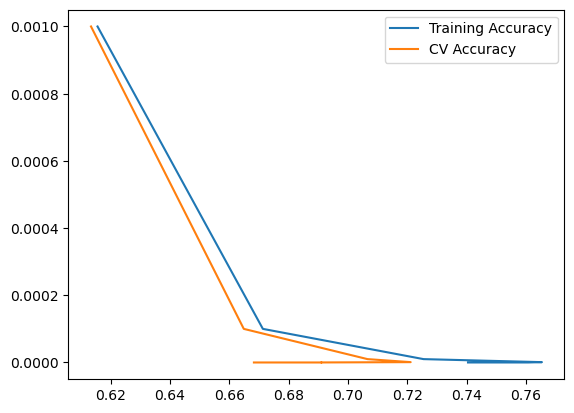

In [93]:
import matplotlib.pyplot as plt
lis = [0.000000001 ,0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001]
plt.plot(score_train[:-2], lis, label = "Training Accuracy")
plt.plot(score_cv[:-2],lis,label = "CV Accuracy")
plt.legend()
plt.show()

In [72]:
#SGDC classifier
#train + test data
best_alpha = 1e-7

In [73]:
from sklearn.metrics import confusion_matrix
clf = SGDClassifier(alpha = best_alpha, loss = "log", class_weight = "balanced", n_jobs = -1)
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_predict)
cm = confusion_matrix(Y_test, Y_predict)
print("The accuracy of the model using SGDC Classifier is: ", acc)

The accuracy of the model using SGDC Classifier is:  0.7138613349865675


<AxesSubplot:>

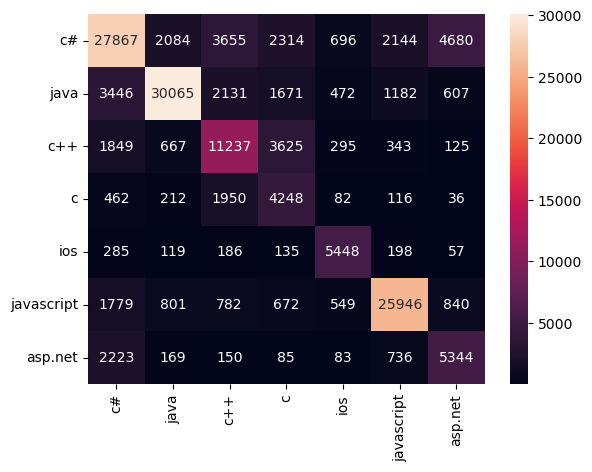

In [69]:
x_axis = ["c#" , "java", "c++", "c", "ios","javascript","asp.net"]
y_axis = ["c#" , "java", "c++", "c", "ios","javascript","asp.net"]
sns.heatmap(cm, annot = True, fmt = "d", xticklabels = x_axis, yticklabels = y_axis)

In [98]:
#SGDC classifier
#train + cv data and without log parameter
score_train = []
score_cv = []
for i in ([1e-9, 1e-8, 1e-7, 1e-6, 0.00001, 0.0001]):
    clf = SGDClassifier(alpha = i, class_weight="balanced", n_jobs=-1)
    clf.fit(X_train, Y_train)
    Y_predict = clf.predict(X_train)
    Y_predict_cv = clf.predict(X_cv)
    score_train.append(accuracy_score(Y_train, Y_predict))
    score_cv.append(accuracy_score(Y_cv, Y_predict_cv))

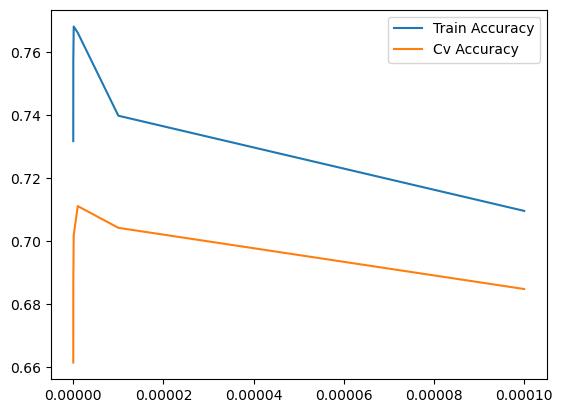

In [100]:
lis = [0.000000001 ,0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001]
plt.plot(lis, score_train, label = "Train Accuracy")
plt.plot(lis, score_cv, label = "Cv Accuracy")
plt.legend()
plt.show()

In [74]:
#SGDC classifier
#train + cv data
best_alpha = 1e-6

The Accuracy of model is :  0.7103611283323


<AxesSubplot:>

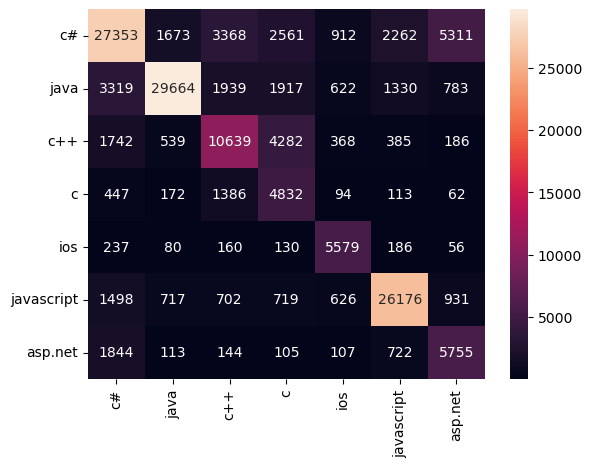

In [75]:
clf = SGDClassifier(alpha = best_alpha, class_weight="balanced", n_jobs=-1)
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_predict)
cm = confusion_matrix(Y_test, Y_predict)
print("The Accuracy of model is : ", acc)
sns.heatmap(cm, annot = True, fmt="d", xticklabels = x_axis, yticklabels = y_axis)

For Bigrams

In [105]:
import random
random.seed(42)
XB_train, XB_test, yB_train, yB_test = train_test_split(x, y, test_size=0.20)
XB_train, XB_cv, yB_train, yB_cv = train_test_split(XB_train, yB_train, test_size=0.25)
XB_train.shape, XB_test.shape, XB_cv.shape


((464541,), (154848,), (154848,))

In [106]:
tfidf = TfidfVectorizer(ngram_range=(2,2))
XB_train = tfidf.fit_transform(XB_train)
XB_cv = tfidf.transform(XB_cv)
XB_test = tfidf.transform(XB_test)
XB_train.shape, XB_cv.shape, XB_test.shape

((464541, 886775), (154848, 886775), (154848, 886775))

In [107]:
score_train = []
score_cv = []
for i in ([1e-9, 1e-8, 1e-7, 1e-6, 0.00001, 0.0001]):
    clf = SGDClassifier(alpha = i, loss = "log", class_weight="balanced", n_jobs=-1)
    clf.fit(XB_train, yB_train)
    yB_predict = clf.predict(XB_train)
    yB_predict_cv = clf.predict(XB_cv)
    score_train.append(accuracy_score(yB_train, yB_predict))
    score_cv.append(accuracy_score(yB_cv, yB_predict_cv))

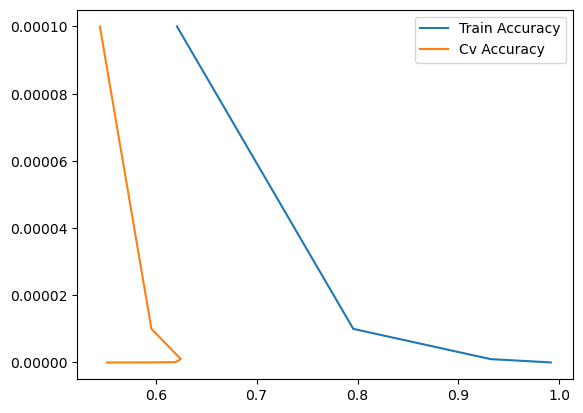

In [109]:
lis = [0.000000001 ,0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001]
plt.plot(score_train, lis, label = "Train Accuracy")
plt.plot(score_cv, lis, label = "Cv Accuracy")
plt.legend()
plt.show()


For Trigrams

In [110]:
import random
random.seed(42)
XT_train, XT_test, yT_train, yT_test = train_test_split(x, y, test_size=0.20)
XT_train, XT_cv, yT_train, yT_cv = train_test_split(XT_train, yT_train, test_size=0.25)
XT_train.shape, XT_test.shape, XT_cv.shape

((464541,), (154848,), (154848,))

In [111]:
tfidf = TfidfVectorizer(ngram_range=(3,3))
XT_train = tfidf.fit_transform(XT_train)
XT_cv = tfidf.transform(XT_cv)
XT_test = tfidf.transform(XT_test)
XT_train.shape, XT_cv.shape, XT_test.shape

((464541, 1370349), (154848, 1370349), (154848, 1370349))

In [113]:
score_train = []
score_cv = []
for i in ([1e-9, 1e-8, 1e-7, 1e-6, 0.00001, 0.0001]):
    clf = SGDClassifier(alpha = i, loss = "log", class_weight="balanced", n_jobs=-1)
    clf.fit(XT_train, yT_train)
    yT_predict = clf.predict(XT_train)
    yT_predict_cv = clf.predict(XT_cv)
    score_train.append(accuracy_score(yT_train, yT_predict))
    score_cv.append(accuracy_score(yT_cv, yT_predict_cv))

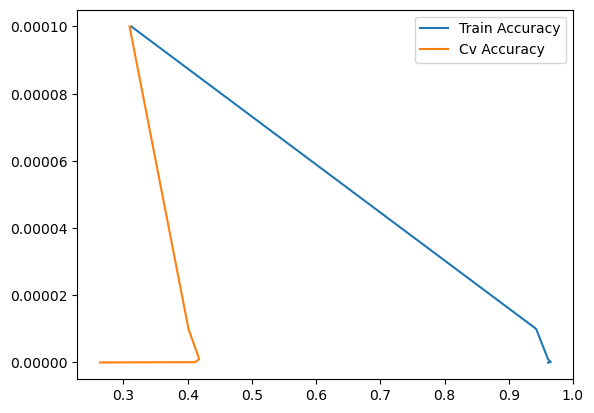

In [114]:
lis = [0.000000001 ,0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001]
plt.plot(score_train, lis, label = "Train Accuracy")
plt.plot(score_cv, lis, label = "Cv Accuracy")
plt.legend()
plt.show()


Case of Overfitting - ytest+ ypredict

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20)
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size = 0.25)

In [118]:
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_cv = tfidf.transform(X_cv)
X_test = tfidf.transform(X_test)
X_train.shape, X_cv.shape, X_test.shape

((464541, 60346), (154848, 60346), (154848, 60346))

In [119]:
best_alpha = 1e-6

In [163]:
clf = SGDClassifier(alpha = best_alpha, loss = "log", class_weight="balanced", n_jobs=-1)
clf.fit(X_train, Y_train)
y_predict = clf.predict(X_test)
acc = accuracy_score(Y_test, y_predict)
cm = confusion_matrix(Y_test, y_predict)
print("The Accuracy of model is : ", acc)

The Accuracy of model is :  0.7232382723703245


In [164]:
#tfidf = TfidfVectorizer()
#X_test = tfidf.transform(['Create Non-Culture Based ResourceManager for ASP.Net'])
#X_test[0]
#lf.predict(['Create Non-Culture Based ResourceManager for ASP.Net'])

Random Forest

In [ ]:
#Random Forest
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
#clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
#clf.fit(X_train, y_train)
#y_predict = clf.predict(X_test)
#acc = accuracy_score(y_test, y_predict)
#cm = confusion_matrix(y_test, y_predict)
#print("The Accuracy of model is : ", acc
print(1)

In [125]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators = 8, random_state = 8)
clf.fit(X_train, Y_train)
y_predict = clf.predict(X_test)
acc = accuracy_score(Y_test, y_predict)
print("The Accuracy of model is : ", acc)

The Accuracy of model is :  0.6797504649721017


In [126]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(criterion = "entropy", n_estimators = 8, max_depth = 15, random_state = 8)
clf.fit(X_train, Y_train)
y_predict = clf.predict(X_test)
acc = accuracy_score(Y_test, y_predict)
print("The Accuracy of model is : ", acc)

The Accuracy of model is :  0.47216625335813184


Decision Tree

In [127]:
#Decision Tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "entropy")
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_predict)
print("The Accuracy of model is : ", acc)

The Accuracy of model is :  0.6266919818144244


XGB Classifier

In [ ]:
import xgboost

In [169]:
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.metrics import confusion_matrix , accuracy_score



from xgboost import XGBClassifier
reg=XGBClassifier()
clf=GridSearchCV(reg,params,cv=10,n_jobs=-1,verbose=1)
clf.fit(X_train, Y_train)
y_predict=clf.predict(X_train)
t_predict=clf.predict(X_test)
acc1 = accuracy_score(y_predict,Y_train)
acc2 = accuracy_score(t_predict,Y_test)
print("The Accuracy of model is : ", acc2)
print("The Accuracy of model is : ", acc1)
clf.best_params_

ModuleNotFoundError: No module named 'xgboost'

KNN Clustering

In [ ]:
#Predicting values of K
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
# Will take some time
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue', linestyle ='dashed', 
         marker ='o',markerfacecolor ='red', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [ ]:
#From above value of K = 1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, Y_train)
y_predict = knn.predict(X_test)
acc1 = accuracy_score(y_predict,Y_train)
acc2 = accuracy_score(y_predict,Y_test)
print("The Accuracy of model is : ", max(acc1,acc2))